# 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\sign_mnist_test.csv
./input\sign_mnist_train.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 데이터 로드

In [4]:
train = pd.read_csv("./input/sign_mnist_train.csv")
test = pd.read_csv("./input/sign_mnist_test.csv")

# 데이터 확인 및 전처리

In [5]:

y = test['label']
y

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [6]:
test['label']

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
label_names = train['label'].values

In [9]:
train.shape

(27455, 785)

In [10]:
unique_val = np.array(label_names)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [11]:
unique_val

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [12]:
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [13]:
train.drop('label', axis = 1, inplace = True)

In [14]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

# LabelBinarizer

In [17]:
# one -hot 인코딩 하기
# labelBinarizer 를 사용하여 분류한 것을 숫자 형태로 변경한다.
# 다중 클래스 레이블 -> 이진 레이블로 변환 시켜준다.

from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(label_names)

In [15]:
label_names

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
batch_size = 256
num_classes = 24
epochs = 50

# 이미지 데이터 정규화

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [25]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

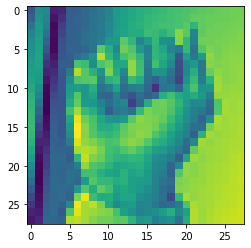

In [26]:
plt.imshow(x_train[0].reshape(28,28))

# 층 구성

In [30]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'softmax'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

# compile

In [31]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['AUC'])

# fit

In [32]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/50
76/76 [==============================] - 9s 111ms/step - loss: 3.1718 - auc: 0.5266 - val_loss: 3.1423 - val_auc: 0.6072
Epoch 2/50
76/76 [==============================] - 8s 108ms/step - loss: 2.9217 - auc: 0.7218 - val_loss: 2.6273 - val_auc: 0.8306
Epoch 3/50
76/76 [==============================] - 8s 108ms/step - loss: 2.3380 - auc: 0.8678 - val_loss: 2.0064 - val_auc: 0.9135
Epoch 4/50
76/76 [==============================] - 8s 110ms/step - loss: 1.9261 - auc: 0.9150 - val_loss: 1.6726 - val_auc: 0.9433
Epoch 5/50
76/76 [==============================] - 8s 110ms/step - loss: 1.6331 - auc: 0.9423 - val_loss: 1.3928 - val_auc: 0.9617
Epoch 6/50
76/76 [==============================] - 9s 113ms/step - loss: 1.3549 - auc: 0.9617 - val_loss: 1.1297 - val_auc: 0.9761
Epoch 7/50
76/76 [==============================] - 8s 111ms/step - loss: 1.1536 - auc: 0.9726 - val_loss: 0.9664 - val_auc: 0.9822
Epoch 8/50
76/76 [==============================] - 9s 114ms/step - loss: 0.

In [33]:
test_labels = test['label']

In [34]:
test.drop('label', axis = 1, inplace = True)

In [35]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [36]:
test_labels = label_binrizer.fit_transform(test_labels)

In [37]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [38]:
test_images.shape

(7172, 28, 28, 1)

# predict

In [39]:
y_pred = model.predict(test_images)

225/225 [==============================] - 1s 5ms/step


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(test_labels, y_pred.round())

0.6971556051310652